# Modelo Dorogovtsev - Mendes (DM) para redes sem escala típica.

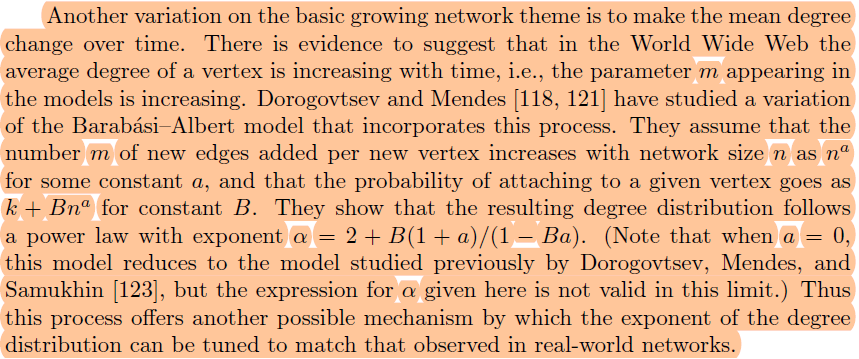

## Desenvolvimento do modelo

In [1]:
# Bibliotecas

import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Configurações iniciais, definição dos parâmetros e criação das listas

# Coeficientes
a = 0.6644
B = 1

#ite_n = M_o + 1 # 'ite_n' fará o papel de N (atual da rede)
M_o = 3 # Para condição inicial (constante)
N = 0 # variável para o crescimento da rede
N_final = 1000 # Tamanho final da rede (tem a função de gerar as listas com os tamanhos necessários)
f = 0.9 # f: fator de proporcionalidade. Tem a função de garantir que M < N sempre

lista_k = [0]*N_final # Para armazenamento dos graus de cada vértice
lista_adj = [0]*N_final # Para armazenamento das ligações de cada vértice

lista_todas_prob = [0]*N_final # Armazenamento das probabilidades de cada vértice
lista_soma_prob = [0]*N_final # Armazenamento da som das probabilidades para cada posição (utilizado para seleção das ligações do novo vértice)

# contador para criação da lista_adj[] com o tamanho final da rede
ite_n = 0

# Cria uma lista com o tamanho desejado do sistema
while ite_n < N_final:
  lista_adj[ite_n] = [ite_n] # Em cada posição da lista_adj[] será criada uma outra lista com um único item, de acordo com a numeração ite_n
  ite_n += 1


In [3]:
# # Passo (1) - Condição inicial da rede

# Contadores
ite_m = 0
ite_m2 = 0 

# Gera a condição inicial (T=0) 
while ite_m < M_o:
  ite_m2 = ite_m + 1
  
  while ite_m2 < M_o + 1: # Pois o número inicial de vértices existentes (N_o = M_o + 1) precisa ser maior do que M_o. ite_m2 faz o papel de N_o.
    # Atualiza as ligações entre dois vértices
    lista_adj[ite_m].append(ite_m2)
    lista_adj[ite_m2].append(ite_m) 

    # Atualiza os graus dos vértices que foram ligados
    lista_k[ite_m] = lista_k[ite_m] + 1
    lista_k[ite_m2] = lista_k[ite_m2] + 1

    ite_m2 += 1
  ite_m += 1

print(lista_adj)
print(lista_k)

[[0, 1, 2, 3], [1, 0, 2, 3], [2, 0, 1, 3], [3, 0, 1, 2], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [1

In [4]:
# Cálcula a probabilidade de conexão associada a cada vértice que já está na rede
def calcula_prob(ite_n): # O parâmetro recebido 'ite_n' diz a função quandos vértices já fazem parte da rede a cada iterada 
  soma_prob = 0
  #soma_lista_k = float(sum(lista_k)) # Somatório dos graus  no denominador da equação da probabilidade


  ite_p = 0 # contador

  while ite_p < ite_n: # O percorrimento desse 'while' aumenta a cada iterada a medida que o variável associada ao tamanho da rede atual (ite_n) aumenta
    prob = float((lista_k[ite_p]) + B * (ite_n ** a))/(float(sum(lista_k)) + float(ite_n * B * (ite_n ** a))) 
    lista_todas_prob[ite_p] = prob # Armazena a probabilidade de conexão (conectividade Ki) do vértice na posição 'ite_p'
    soma_prob = soma_prob + prob
    lista_soma_prob[ite_p] = soma_prob # Armazena a soma das probabilidades atual para cada vértice na posição 'ite_p'. A soma acumulada aumenta com ite_p, 
                                       # de maneira que menores índices de probabilidade acumulada (posições iniciais em 'lista_todas_prob[]) favoreçam os vértices iniciais
    ite_p += 1                         # a receberem ligação primeiro (ligação pref) a medida que a 'lista_soma_prob' é percorrida na função 'encontra_v2'


In [5]:
# Função que procura com quem o vértice que está entrando na rede irá se conectar. 
# É esta função que caracteriza a regra da ligação preferencial
def encontra_v2(ite_n, prob_v2):
  ite_n2 = 0 # Contador para indexar a posição na lista 'lista_soma_prob'

  while ite_n2 < ite_n: # Percorre no máximo o tamanho da lista de acordo com a quantidade atual de elementos (ite_n)
    if lista_soma_prob[ite_n2] >= prob_v2: # ALTERAR ESTA CONDIÇÃO. PERCORRER A LISTA SOMA_PROB OU LISTA_TODAS_PROB POR ÍNDICES DE MAIOR PROBEBILIDADE PRIMEIRO, E NÃO ordenado
      return ite_n2
    ite_n2 += 1

In [6]:
# Passo (2) - Laço principal (iteração das regras de conexão)

ite_n = M_o + 1 # 'ite_n' fará o papel de N (atual da rede)

while ite_n < N_final: # Executado enquanto 'ite_n' (que representa o N atual) seja menor do que o 'N_final' (tamanho final da rede)
  M = M_o + math.floor(f * (ite_n**a)) # Equação 18
  v1 = ite_n # Vértice que está entrando na rede
  calcula_prob(ite_n) # Calcula a probabilidade associada a cada vértice que está na rede de receber ligações do vértice que entrou a cada iterada e armazena esses valores
  
  ite_m = 0 # Contador

  while ite_m < M: # Bloco executado sempre M vezes 
    prob_v2 = random.random() # Número aleatório entre 0-1 (para comparação com v2 na função 'encontra_v2')
    v2 = encontra_v2(ite_n, prob_v2) # Vértice da rede escolhido através da execução da função 'encontra_v2' para receber ligação do vértice que está entrando (v1)

    while v2 in lista_adj[v1]: # Este laço evita autoarestas e limitam os vértices a terem no máximo uma ligação entre si
      prob_v2 = random.random()
      v2 = encontra_v2(ite_n, prob_v2)

    # Adiciona na posição [v2] (que é uma lista por sí só dentro da lista_adj[]) o valor v2
    lista_adj[v2].append(v1) 
  
    # Atualiza os gráus de entrada dos vértices em questão na posição v2
    lista_k[v2] = lista_k[v2] + 1

    ite_m += 1
  #print('M = ',  M, 'N = ', ite_n)
  ite_n += 1

# Passo (3) - Extração de dados da rede

max_k = max(lista_k) # Armazena na variável o maior valor da lista_k[]
histograma_k = [0]*(max_k + 1) # Criar a quantidade de posições na lista histograma_k necessárias para o armazenamento
soma_histograma_k = [0]*(max_k + 1)

ite_n = 0

while ite_n < N_final:
  histograma_k[lista_k[ite_n]] = histograma_k[lista_k[ite_n]] + 1 # Armazena em cada posição da lista histograma_k[] a quantidade de vértices que possuem tal grau. 
                                                                  # Cada posição na lista histograma_k[] significa o valor do grau. [0] grau zero; [1] grau 1...
                                                                  # Exemplo: [0,5,2,7,10,8] a posição [3] (grau 3) possui 7 vértices com grau 3
  ite_n += 1 



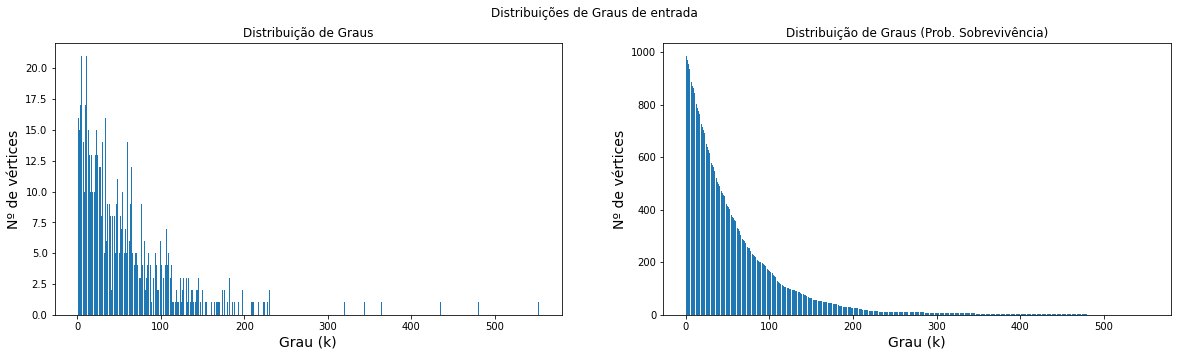

 soma_histograma_k:  [985, 969, 954, 937, 916, 901, 886, 872, 862, 845, 824, 816, 803, 788, 775, 765, 752, 742, 727, 714, 704, 691, 676, 663, 651, 638, 626, 614, 606, 592, 577, 569, 564, 548, 542, 533, 520, 506, 497, 489, 487, 479, 470, 465, 457, 452, 443, 432, 422, 414, 409, 401, 394, 384, 380, 373, 368, 361, 356, 342, 336, 332, 326, 317, 305, 300, 292, 289, 285, 280, 275, 271, 265, 259, 256, 253, 244, 240, 236, 232, 226, 224, 221, 217, 212, 209, 206, 202, 201, 201, 198, 197, 195, 190, 186, 184, 182, 176, 172, 166, 162, 162, 159, 158, 153, 149, 142, 138, 133, 127, 124, 121, 117, 116, 115, 113, 108, 107, 105, 104, 103, 103, 102, 99, 98, 96, 93, 93, 93, 93, 90, 89, 86, 86, 86, 85, 83, 81, 80, 78, 78, 77, 75, 73, 70, 69, 66, 65, 65, 63, 63, 61, 58, 57, 56, 56, 56, 56, 54, 52, 51, 51, 51, 50, 50, 50, 49, 48, 47, 46, 45, 45, 45, 43, 43, 41, 41, 41, 41, 40, 40, 37, 36, 35, 35, 34, 34, 33, 31, 30, 30, 30, 29, 29, 29, 29, 29, 27, 27, 27, 26, 25, 25, 25, 25, 25, 23, 23, 22, 21, 20, 20, 19, 19,

In [8]:
# Passo (4) - Extração dos dados

# Plot do histograma

k = [] # Lista que armazenara os valores dos graus
i = 0

for i in range(len(histograma_k)):
  soma_histograma_k[i] = sum(histograma_k[i+1:]) # soma, em cada posição 'i' a quantidade de vértices presentes na rede que possuem mais 
                                                 # do que 'i' conexões (probabilidade de sobrevivencia)
  k.append(i + 1) # +1 para sincronizar a lista 'k' com 'histograma_k'
  i += 1

# Cria um 'espaço' de tamanho x = 30 e y = 5 inches onde iremos plotar os subgráficos
figura= plt.figure(figsize=(20,5))
figura.suptitle('Distribuições de Graus de entrada') # título geral do 'espaço'
facecolor='blue'

# primeiro subgráfico
figura.add_subplot(121) # '1' linha, '2' colunas e o último '1' significa o plot do subgráfico na primeira posição
plt.bar(k, histograma_k)
plt.xlabel('Grau (k)', fontsize = 14)
plt.ylabel('Nº de vértices', fontsize = 14)
plt.title ('Distribuição de Graus')

# Segundo subgráfico
figura.add_subplot(122)
plt.bar(k, soma_histograma_k)
plt.xlabel('Grau (k)', fontsize = 14)
plt.ylabel('Nº de vértices', fontsize = 14)
plt.title('Distribuição de Graus (Prob. Sobrevivência)')

#plt.savefig('grafico.png', dpi =100) # salva a figura na mesma pasta que está o arquivo
plt.show(figura)

np.savetxt('Distribuicao_sobrevivencia.dat', np.array([k,soma_histograma_k]).transpose()) # salva arquivo .dat
np.savetxt('distribuicao_normal.dat', np.array([k,histograma_k]).transpose()) # salva arquivo .dat

print(' soma_histograma_k: ', soma_histograma_k)
print('      histograma_k: ', histograma_k)
print('           Lista k: ', k)


<ipython-input-10-2c5dc0596ad9>:18: RuntimeWarning: divide by zero encountered in log
  Z1 = np.log(Z)


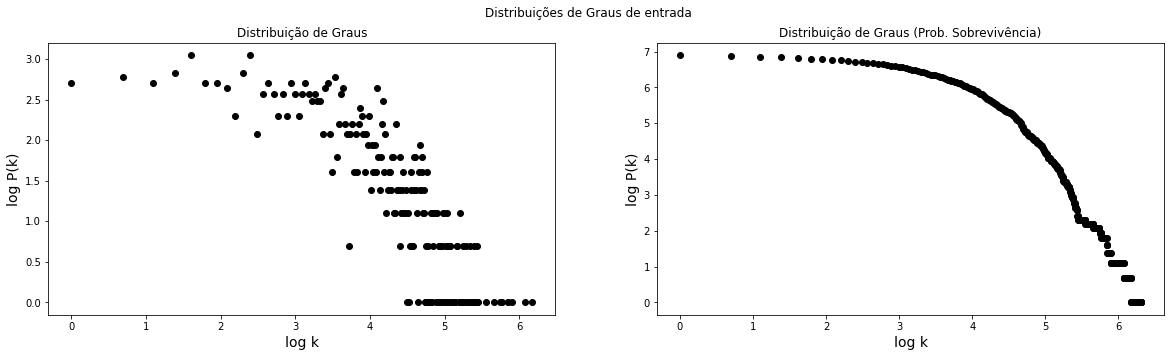

In [10]:
# plot da distribuição log-log

# Convertendo 'k' e 'histograma_k' em um array NumPy. X = k ; Y = histograma_k
X = np.array(k)
Y = np.array(soma_histograma_k)
Z = np.array(histograma_k)

# Mapeia quais índices em Y possuem valor 0  armazena em 'indexes'. 'indexes' é uma lista que armazena as posições que possuem o valor 0
indexes = np.where(Y == 0)

# Remove das listas X e Y os índices que possuem elementos 0 da lista Y. Argumentos da função 'delete(arr, obj, axis)'
X = np.delete(X, indexes)
Y = np.delete(Y, indexes)
Z = np.delete(Z, indexes)

X1 = np.log(X)
Y1 = np.log(Y)
Z1 = np.log(Z)

X = X1
Y = Y1
Z = Z1

# Cálculo da regressão linear 

# Parâmetros para ajuste de regressão (P: limite inferior, Q: limite superior)
#P = 25
#Q = 2500

#media_X = np.mean(X[P:Q])
#media_Y = np.mean(Y[P:Q])

#erro_X = X[P:Q]-media_X
#erro_Y = Y[P:Q]-media_Y

#soma_erro_XY = np.sum(erro_X*erro_Y)
#erro_X_quadratico = (X[P:Q]-media_X)**2.0
#soma_erro_X_quadratico = np.sum(erro_X_quadratico)

#m = soma_erro_XY / soma_erro_X_quadratico 
  #print("Coeficiente angular = {:0.2f}".format(m))

#c = media_Y - m*media_X
#print("Coeficiente linear = {:0.2f}".format(c))

#amostras_m.append(m)

#amostra += 1

#print('amostras_m: ', amostras_m)
#print('Média m (Gamma): ',np.abs(np.mean(amostras_m)), '\nDesvio Padrão (modelo DM): ', np.std(amostras_m), '\nVariância: ', np.var(amostras_m))
#print('Desvio padrão relativo: ', np.abs((np.std(amostras_m)/(np.mean(amostras_m))) * 100), '%')

#reta = m*X+c


# Cria um 'espaço' de tamanho x = 20 e y = 5 inches onde iremos plotar os subgráficos
figura= plt.figure(figsize=(20,5))
figura.suptitle('Distribuições de Graus de entrada') # título geral do 'espaço'
facecolor='blue'

# Primeiro subgráfico
figura.add_subplot(121)
plt.scatter(X,Z,label='Y(X)', color='black')
plt.xlabel('log k', fontsize = 14)
plt.ylabel('log P(k)', fontsize = 14)
plt.title('Distribuição de Graus')

# Segundo subgráfico (gráico da regressão linear)
figura.add_subplot(122) # '1' linha, '2' colunas e o último '1' significa o plot do subgráfico na primeira posição
plt.scatter(X,Y,label='Y(X)', color='black')
#plt.plot(X[P:Q],reta[P:Q],label='Ajuste linear',color='red'); # plot da reta de regressão
plt.xlabel('log k', fontsize = 14)
plt.ylabel('log P(k)', fontsize = 14)
plt.title ('Distribuição de Graus (Prob. Sobrevivência)')

#plt.savefig('grafico.png', dpi =100) # salva a figura na mesma pasta que está o arquivo
plt.show(figura)

## Amostras do expoente Gamma

amostras_m:  [-4.992726308029358, -4.598227571865588, -4.57537947381266, -4.711903879723364, -4.56722134657846, -4.397734209378077, -4.652811480407276, -4.500341912779085, -4.7251515636551265, -4.724570712352396]
Média m (Gamma):  4.6446068458581395 
Desvio Padrão (modelo DM):  0.15275977526865947 
Variância:  0.023335548940131345
Desvio padrão relativo:  3.288971065546357 %
media_m:  [3.633682079737625, 3.8499623628585105, 3.9446390035960044, 4.139374905133233, 4.434934908431217, 4.5293785464731915, 4.6019168889722355, 4.527133809867475, 4.665606255630504, 4.6446068458581395]
erro_m:  [0.8533032803799945, 0.34140772903535227, 0.30047810342737674, 0.29032406252397985, 0.43624110529854504, 0.3232114697644573, 0.21695678980269395, 0.24039213759737513, 0.1571352700298279, 0.15275977526865947]
Tamanho da rede:  [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]


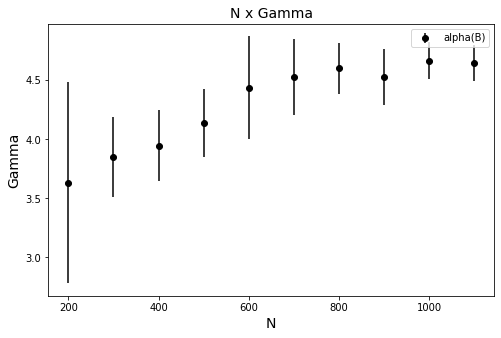

In [11]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

count1 = 0 # contador para cada valor de 'N_final'

net_size_N = []
media_m = [] # Armazena os valores das médias do expoente 'Gamma' para cada 'N_final' (EIXO Y)
erro_m = [] # Amazena os valores dos erros para cada 'N_final'. Estes valores serão os tamanhos das barras de erros

N_final = 200

n_amostras = 10

for count1 in range(10):
  # Contadores
  erro = 0
 
  # A lista zera a cada nova contagem (count2)
  amostras_m = [] # Armazena as amostras do expoente 'Gamma'

  # Variável zera a cada nova contagem 'count2'
  amostra = 0

  while amostra < n_amostras:

    # Configurações iniciais, definição dos parâmetros e criação das listas

    # Coeficientes
    a = 0.99 # valor anterior: a = 2/3, para alpha = 7
    B = 0.72

    M_o = 3 # Para condição inicial (constante)
    N = 0 # variável para o crescimento da rede
  
    f = 0.9 # f: fator de proporcionalidade. Tem a função de garantir que M < N sempre

    lista_k = [0]*N_final # Para armazenamento dos graus de cada vértice
    lista_adj = [0]*N_final # Para armazenamento das ligações de cada vértice

    lista_todas_prob = [0]*N_final # Armazenamento das probabilidades de cada vértice
    lista_soma_prob = [0]*N_final # Armazenamento da som das probabilidades para cada posição (utilizado para seleção das ligações do novo vértice)

    # contador para criação da lista_adj[] com o tamanho final da rede
    ite_n = 0

    # Cria uma lista com o tamanho desejado do sistema
    while ite_n < N_final:
      lista_adj[ite_n] = [ite_n] # Em cada posição da lista_adj[] será criada uma outra lista com um único item, de acordo com a numeração ite_n
      ite_n += 1

    # Passo (1): condição inicial da rede

    # Contadores
    ite_m = 0
    ite_m2 = 0 

    # Gera a condição inicial (T=0) 
    while ite_m < M_o:
      ite_m2 = ite_m + 1
  
      while ite_m2 < M_o + 1: # Pois o número inicial de vértices existentes (N_o = M_o + 1) precisa ser maior do que M_o. ite_m2 faz o papel de N_o.
        # Atualiza as ligações entre dois vértices
        lista_adj[ite_m].append(ite_m2)
        lista_adj[ite_m2].append(ite_m) 

        # Atualiza os graus dos vértices que foram ligados
        lista_k[ite_m] = lista_k[ite_m] + 1
        lista_k[ite_m2] = lista_k[ite_m2] + 1

        ite_m2 += 1
      ite_m += 1

    # Cálcula a probabilidade de conexão associada a cada vértice que já está na rede
    def calcula_prob(ite_n): # O parâmetro recebido 'ite_n' diz a função quandos vértices já fazem parte da rede a cada iterada 
      soma_prob = 0

      ite_p = 0 # contador

      while ite_p < ite_n: # O percorrimento desse 'while' aumenta a cada iterada a medida que o variável associada ao tamanho da rede atual (ite_n) aumenta
        prob = float((lista_k[ite_p]) + B * (ite_n ** a))/(float(sum(lista_k)) + float(ite_n * B * (ite_n ** a))) 
        lista_todas_prob[ite_p] = prob # Armazena a probabilidade de conexão (conectividade Ki) do vértice na posição 'ite_p'
        soma_prob = soma_prob + prob
        lista_soma_prob[ite_p] = soma_prob # Armazena a soma das probabilidades atual para cada vértice na posição 'ite_p'. A soma acumulada aumenta com ite_p, 
                                       # de maneira que menores índices de probabilidade acumulada (posições iniciais em 'lista_todas_prob[]) favoreçam os vértices iniciais
        ite_p += 1

    # Função que procura com quem o vértice que está entrando na rede irá se conectar. 
    # É esta função que caracteriza a regra da ligação preferencial
    def encontra_v2(ite_n, prob_v2):
      ite_n2 = 0 # Contador para indexar a posição na lista 'lista_soma_prob'

      while ite_n2 < ite_n: # Percorre no máximo o tamanho da lista de acordo com a quantidade atual de elementos (ite_n)
        if lista_soma_prob[ite_n2] >= prob_v2: # ALTERAR ESTA CONDIÇÃO. PERCORRER A LISTA SOMA_PROB OU LISTA_TODAS_PROB POR ÍNDICES DE MAIOR PROBEBILIDADE PRIMEIRO, E NAO ordenado
          return ite_n2
        ite_n2 += 1    

   # Passo (2) - laço principal: iteração das regras de conexão

    ite_n = M_o + 1 # 'ite_n' fará o papel de N (atual da rede)

    while ite_n < N_final: # Executado enquanto 'ite_n' (que representa o N atual) seja menor do que o 'N_final' (tamanho final da rede)
      M = math.floor((M_o - 1) + f * (ite_n**a)) # Expressão para M (grau médio da rede) que será atualizado a medida que a rede cresce (variável com N). 
                                                 # Se a=0, M = M_o (modelo BA clássico).
      v1 = ite_n # Vértice que está entrando na rede
      calcula_prob(ite_n) # Calcula a probabilidade associada a cada vértice que está na rede de receber ligações do vértice que entrou a cada iterada e armazena esses valores
  
      ite_m = 0 # Contador

      while ite_m < M: # Bloco executado sempre M vezes 
        prob_v2 = random.random() # Número aleatório entre 0-1 (para comparação com v2 na função 'encontra_v2')
        v2 = encontra_v2(ite_n, prob_v2) # Vértice da rede escolhido através da execução da função 'encontra_v2' para receber ligação do vértice que está entrando (v1)

        while v2 in lista_adj[v1]: # Este laço evita autoarestas e limitam os vértices a terem no máximo uma ligação entre si
          prob_v2 = random.random()
          v2 = encontra_v2(ite_n, prob_v2)

        # Adiciona na posição [v2] (que é uma lista por sí só dentro da lista_adj[]) o valor v1
        lista_adj[v2].append(v1) 
  
        # Atualiza os gráus dos vértices em questão nas posições v2
        lista_k[v2] = lista_k[v2] + 1

        ite_m += 1
      # print('M = ',  M, 'N = ', ite_n)
      ite_n += 1

    # Passo (3) - Extração de dados da rede

    max_k = max(lista_k) # Armazena na variável o maior valor da lista_k[]
    histograma_k = [0]*(max_k + 1) # Criar a quantidade de posições na lista histograma_k necessárias para o armazenamento
    soma_histograma_k = [0]*(max_k + 1)

    ite_n = 0

    while ite_n < N_final:
      histograma_k[lista_k[ite_n]] = histograma_k[lista_k[ite_n]] + 1 # Armazena em cada posição da lista histograma_k[] a quantidade de vértices que possuem tal grau. 
                                                                  # Cada posição na lista histograma_k[] significa o valor do grau. [0] grau zero; [1] grau 1...
                                                                  # Exemplo: [0,5,2,7,10,8] a posição [3] (grau 3) possui 7 vértices com grau 3
      ite_n += 1

    # Plot do histograma

    k = [] # Lista que armazenara os valores dos graus
    i = 0

    for i in range(len(histograma_k)):
      soma_histograma_k[i] = sum(histograma_k[i+1:]) # soma, em cada posição 'i' a quantidade de vértices presentes na rede que possuem mais 
                                                 # do que 'i' conexões (probabilidade de sobrevivencia)
      k.append(i + 1) # +1 para sincronizar a lista 'k' com 'histograma_k'
      i += 1

    """Filtragem da lista 'k' e 'histograma_k'
      Necessária para eliminar elementos nulos na lista histograma_k e remover nesses mesmos índices os elementos da lista 'k'.
      Assim, teremos as duas listas apenas com os graus e a quantidades de vértices com tais graus existentes, eliminando valores
      nulos, de maneira a evitar erros na regressão linear."""

    # Convertendo 'k' e 'histograma_k' em um array NumPy. X = k ; Y = histograma_k
    X = np.array(k)
    Y = np.array(soma_histograma_k)

    # Mapeia quais índices em Y possuem valor 0 ou N_final - 5 e armazena em 'indexes'. 'indexes' é uma lista que armazena as posições que possuem o valor 0
    indexes = np.where((Y == 0) | (Y >= math.ceil(0.1*N_final)) | (Y <= math.ceil(0.01*N_final)))

    # Remove das listas X e Y os índices que possuem elementos 0 da lista Y. Argumentos da função 'delete(arr, obj, axis)'
    X = np.delete(X, indexes)
    Y = np.delete(Y, indexes)

    X1 = np.log(X)
    Y1 = np.log(Y)

    X = X1
    Y = Y1

    # Cálculo da regressão linear 

    media_X = np.mean(X)
    media_Y = np.mean(Y)

    erro_X = X-media_X
    erro_Y = Y-media_Y

    soma_erro_XY = np.sum(erro_X*erro_Y)
    erro_X_quadratico = (X-media_X)**2.0
    soma_erro_X_quadratico = np.sum(erro_X_quadratico)

    m = soma_erro_XY / soma_erro_X_quadratico 
    #print("Coeficiente angular = {:0.2f}".format(m))

    c = media_Y - m*media_X
    #print("Coeficiente linear = {:0.2f}".format(c))

    amostras_m.append(m)
    #print('soma histograma: ',soma_histograma_k)
    #print(Y)
    amostra += 1
    
  media_m.append(np.abs(np.mean(amostras_m))) # Adiciona o valor da média do expoente 'Gamma' 10 contagens para cada valor de 'N_final'

  erro_m.append(np.std(amostras_m)) # Adiciona o valor do erro (desvio padrão). Cada índice refere-se a um valor de 'N_final'
                                    # Ex: erro_m[0, 1, 2, ...], o índice '0' é referente ao 'N_final' = 50, o índice '1' é referente ao 'N_final' = 100, e assim por diante

  net_size_N.append(N_final) # Gera a lista com os valores de 'N_final' 
                      
  N_final += 100

print('amostras_m: ', amostras_m)
print('Média m (Gamma): ',np.abs(np.mean(amostras_m)), '\nDesvio Padrão (modelo DM): ', np.std(amostras_m), '\nVariância: ', np.var(amostras_m))
print('Desvio padrão relativo: ', np.abs((np.std(amostras_m)/(np.mean(amostras_m))) * 100), '%')

print('media_m: ',media_m)
print('erro_m: ',erro_m)
print('Tamanho da rede: ',net_size_N)

# Gráfico da relação entre o expoente 'Gamma' X tamanho da rede 'N'
plt.figure(figsize =(8,5))
plt.errorbar(net_size_N, media_m, yerr = erro_m, fmt = 'o', color = 'black', label='alpha(B)')
plt.title('N x Gamma', fontsize = 14)
plt.xlabel('N', fontsize = 14)
plt.ylabel('Gamma', fontsize = 14)
plt.legend()
plt.show()

np.savetxt('dados_%s.dat'%n_amostras,np.array([net_size_N,media_m,erro_m]).transpose())


## Testes

In [ ]:
# coeficiente da rede
B = 1.0
a = 0.6644

G = 2 + (B + B*a)/(1 - (B*a))

print('Gamma: ', G)

Gamma:  6.959475566150179


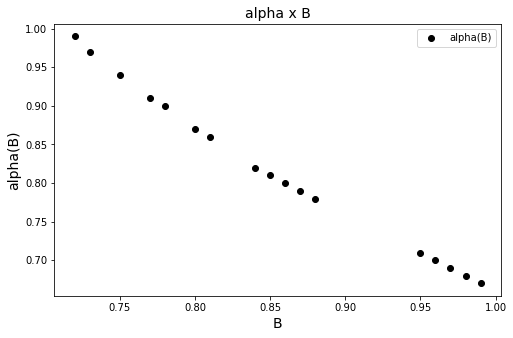

B =  [0.72, 0.73, 0.75, 0.77, 0.78, 0.8, 0.81, 0.84, 0.85, 0.86, 0.87, 0.88, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99]
Alpha =  [0.99, 0.97, 0.9400000000000001, 0.91, 0.9, 0.87, 0.86, 0.8200000000000001, 0.81, 0.8, 0.79, 0.78, 0.71, 0.7000000000000001, 0.6900000000000001, 0.68, 0.67]


In [ ]:
# Gráfico para Combinações possíveis alpha x B para expoente Gamma desejado

lista_a = np.arange(0, 1, 0.01)
lista_B = np.arange(0, 1, 0.01)
pontoY = []
pontoX = []

for i in range(len(lista_B)):
  for j in range(len(lista_a)):
    if (float(2 + (lista_B[i] + (lista_B[i]*lista_a[j]))/(1 - (lista_B[i]*lista_a[j]))) >= 6.9 and 
        float(2 + (lista_B[i] + (lista_B[i]*lista_a[j]))/(1 - (lista_B[i]*lista_a[j]))) <= 7.0):
      pontoX.append(lista_B[i])
      pontoY.append(lista_a[j])
    
plt.figure(figsize =(8,5))
plt.scatter(pontoX, pontoY,label='alpha(B)', color='black');
plt.title('alpha x B', fontsize = 14)
plt.ylabel('alpha(B)', fontsize = 14);
plt.xlabel('B', fontsize = 14);
plt.legend();
plt.show()

print('B = ', pontoX)
print('Alpha = ', pontoY)